In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)
transformations = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


Saving dog.jpeg to dog (1).jpeg


In [ ]:
transformed_image = transformations(image)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(-0.5, 799.5, 599.5, -0.5)

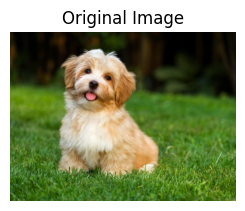

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")


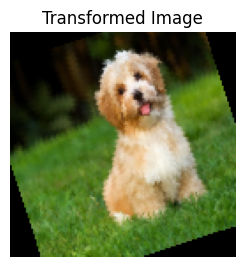

In [ ]:
plt.subplot(1, 2, 2)
plt.title("Transformed Image")
plt.imshow(transformed_image.permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Undo normalization for display
plt.axis("off")
plt.show()

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(10, 2)

    def forward(self, x):
        return self.fc(x)

In [ ]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)
optimizer_adam = optim.Adam(model.parameters(), lr=0.001)
inputs = torch.randn(5, 10)
labels = torch.tensor([0, 1, 0, 1, 1])

In [ ]:
outputs = model(inputs)
loss = criterion(outputs, labels)
optimizer_sgd.zero_grad()
loss.backward()
optimizer_sgd.step()

print("Optimization step complete with SGD.")

In [ ]:
import torch.nn.functional as F
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

In [ ]:
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 32 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
cnn = SimpleCNN()
print("Simple CNN architecture:")
print(cnn)


Simple CNN architecture:
SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
